# HW3

## x axis for train
Feature that use to train model

Open Price, High Price, Low Price, Volume

## y axis for train
The feature we want

Close Price

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection
import random

In [3]:
file_name = 'training set.csv'
train = pd.read_csv(file_name, sep=',')
train=train.drop(["Date","Volume"],axis=1)
train=train
train.head()

,Open Price,Close Price,High Price,Low Price
0,902.99,931.80,934.73,899.35
1,929.17,927.45,936.63,919.53
2,931.17,934.70,943.85,927.28
3,927.45,906.65,927.45,902.37
4,905.73,909.73,910.00,896.81


In [4]:
file_name = 'testing set.csv'
test = pd.read_csv(file_name,sep=",")
test=test.drop(["Date","Volume"],axis=1)
test.head()

,Open Price,Close Price,High Price,Low Price
0,2683.73,2695.81,2695.89,2682.36
1,2697.85,2713.06,2714.37,2697.77
2,2719.31,2723.99,2729.29,2719.07
3,2731.33,2743.15,2743.45,2727.92
4,2742.67,2747.71,2748.51,2737.60


# Logistic Regression part

In [5]:
# def plot_feature(data, feature_name):
#     plt.figure(figsize=(10, 3))
#     plt.scatter(data[feature_name], data['Close Price'])
#     plt.xlabel(feature_name)
#     plt.ylabel('Close Price')
#     plt.show()

# plot_feature(train,'Low Price')

In [6]:
def split(data):
    # control randomization for reproducibility
    x = data.loc[:, data.columns != 'Close Price']
    y = data['Close Price']
    #using one_hot coded since we want to predict the movement, not accurate length
    #zero as 
    one_hot=[1]
    for i in range(1,len(y)):
        if(y[i]>y[i-1]):
            one_hot.append(1)
        else:
            one_hot.append(0)
    return x, one_hot

In [7]:
def evaluate(model, x_train, y_train, x_test, y_test):
    train_preds = model.predict(x_train)
    test_preds = model.predict(x_test)
    train_acc = metrics.accuracy_score(y_train, train_preds)
    test_acc = metrics.accuracy_score(y_test, test_preds)
    print('Train accuracy: %f' % train_acc)
    print('Test accuracy: %f' % test_acc)

In [8]:
def split_train_evaluate(model,train,test):
    x_train,y_train= split(train)
    x_test,y_test=split(test)
    model.fit(x_train, y_train)
    evaluate(model, x_train, y_train, x_test, y_test)

In [9]:
from sklearn.linear_model import LogisticRegression
x_train,y_train= split(train)
x_test,y_test=split(test)
clf = LogisticRegression(multi_class="auto",solver="liblinear" ,max_iter=100).fit(x_train, y_train)
split_train_evaluate(clf, train,test)

Train accuracy: 0.855565
Test accuracy: 0.805556


# SVM part

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
scaler = StandardScaler()
scaler.fit(x_train)

x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

In [11]:
penalty = 0.3

svm = SVC(C=penalty, kernel="linear", probability=True)
svm.fit(x_train, y_train)
  
acc_rate = metrics.accuracy_score(y_test, svm.predict(x_test))
print("Penalty = %.2f, Accuracy = %f" % (penalty, acc_rate))

Penalty = 0.30, Accuracy = 0.809524


# Neural Network part(buggy)

In [12]:
import pandas as pd
from keras import models, layers, optimizers, regularizers,utils
import numpy as np
import random
from sklearn import model_selection, preprocessing
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [13]:
x_train = preprocessing.normalize(x_train)
x_test = preprocessing.normalize(x_test)

In [62]:
hidden_units = 10    # how many neurons in the hidden layer
activation = 'relu'  # activation function for hidden layer
l2 = 0.001           # regularization - how much we penalize large parameter values
learning_rate = 0.1  # how big our steps are in gradient descent
epochs = 20          # how many epochs to train for
batch_size = 50     # how many samples to use for each gradient descent update

In [63]:
# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=3,
                       units=hidden_units, 
                       activation=activation))

# add the output layer
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

In [64]:
class_weight = {
    0: 1.,
    1: 160 / 302
}

print(x_train)
y_train=np.array(y_train)
B = np.reshape(y_train, (-1, 2))
print(B.shape)
print(x_train.shape)

[[0.57133628 0.59141869 0.5690332 ]
 [0.57778572 0.58242458 0.57179128]
 [0.57552278 0.58335984 0.57311851]
 ...
 [0.57732485 0.57808684 0.5766382 ]
 [0.57748267 0.57781806 0.57674956]
 [0.57824861 0.57888725 0.57490704]]
(1132, 2)
(2264, 3)


Epoch 1/10
2264/2264 [==============================] - 0s 30us/step - loss: 0.4985 - acc: 0.4536
Epoch 2/10
2264/2264 [==============================] - 0s 26us/step - loss: 0.4989 - acc: 0.4536
Epoch 3/10
2264/2264 [==============================] - 0s 21us/step - loss: 0.4994 - acc: 0.4536
Epoch 4/10
2264/2264 [==============================] - 0s 18us/step - loss: 0.4986 - acc: 0.4536
Epoch 5/10
2264/2264 [==============================] - 0s 20us/step - loss: 0.4970 - acc: 0.4536
Epoch 6/10
2264/2264 [==============================] - 0s 20us/step - loss: 0.4980 - acc: 0.4536
Epoch 7/10
2264/2264 [==============================] - 0s 20us/step - loss: 0.4981 - acc: 0.4536
Epoch 8/10
2264/2264 [==============================] - 0s 19us/step - loss: 0.4988 - acc: 0.4536
Epoch 9/10
2264/2264 [==============================] - 0s 23us/step - loss: 0.4980 - acc: 0.4536
Epoch 10/10
252/252 [==============================] - 0s 455us/step
Training accuracy: 0.4536219081272085
Testing acc

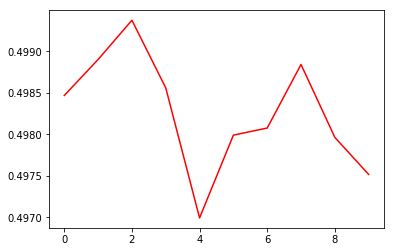

In [69]:
#train the parameters
history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, class_weight=class_weight)

# evaluate accuracy
train_acc = model.evaluate(x_train, y_train, batch_size=1)[1]
test_acc = model.evaluate(x_test, y_test, batch_size=1)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

In [70]:
def train_and_evaluate(model, x_train, y_train, x_test, y_test, n=20):
    train_accs = []
    test_accs = []
    with tqdm(total=n) as progress_bar:
        for _ in range(n):
            model.fit(
                x_train, 
                y_train, 
                epochs=epochs, 
                batch_size=batch_size, 
                class_weight=class_weight, 
                verbose=False)
            train_accs.append(model.evaluate(x_train, y_train, batch_size=32, verbose=False)[1])
            test_accs.append(model.evaluate(x_test, y_test, batch_size=32, verbose=False)[1])
            progress_bar.update()
    print('Avgerage Training Accuracy: %s' % np.average(train_accs))
    print('Avgerage Testing Accuracy: %s' % np.average(test_accs))
    return train_accs, test_accs

In [72]:
_, test_accs = train_and_evaluate(model, x_train, y_train, x_test, y_test)

100%|██████████| 20/20 [00:14<00:00,  1.43it/s]

Avgerage Training Accuracy: 0.45362190833782573
Avgerage Testing Accuracy: 0.47619047902879263


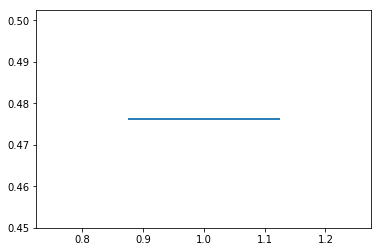

In [73]:
plt.violinplot(test_accs)
plt.show()

In [74]:
print('Min: %s' % np.min(test_accs))
print('Max: %s' % np.max(test_accs))

Min: 0.47619047902879263
Max: 0.47619047902879263


In [76]:
hidden_units = 10    # how many neurons in the hidden layer
activation = 'relu'  # activation function for hidden layer
l2 = 0.              # regularization - how much we penalize large parameter values
learning_rate = 0.1  # how big our steps are in gradient descent
epochs = 50          # how many epochs to train for
batch_size = 32      # how many samples to use for each gradient descent update

In [78]:
def build_model(hidden_units, activation, learning_rate):
    model = models.Sequential()
    model.add(layers.Dense(input_dim=3,
                           units=hidden_units, 
                           activation=activation,
                           kernel_regularizer=regularizers.l2(l2)))
    model.add(layers.Dense(input_dim=hidden_units,
                           units=1,
                           activation='sigmoid',
                           kernel_regularizer=regularizers.l2(l2)))
    model.compile(loss='binary_crossentropy',
                  # Adam is a kind of gradient descent
                  optimizer=optimizers.Adam(lr=learning_rate),
                  metrics=['accuracy'])
    return model

model = build_model(hidden_units, activation, learning_rate)

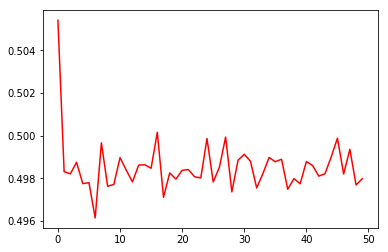

In [79]:
history = model.fit(
    x_train, y_train, epochs=epochs, batch_size=batch_size, 
    class_weight=class_weight, verbose=False)
losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

In [ ]:
_, __ = train_and_evaluate(model, x_train, y_train, x_test, y_test)

  5%|▌         | 1/20 [00:02<00:51,  2.72s/it]